In [3]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [10]:
#2
df=pd.read_csv('calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [11]:
#3
df.shape

(15000, 8)

In [6]:
#4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [12]:
#5
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


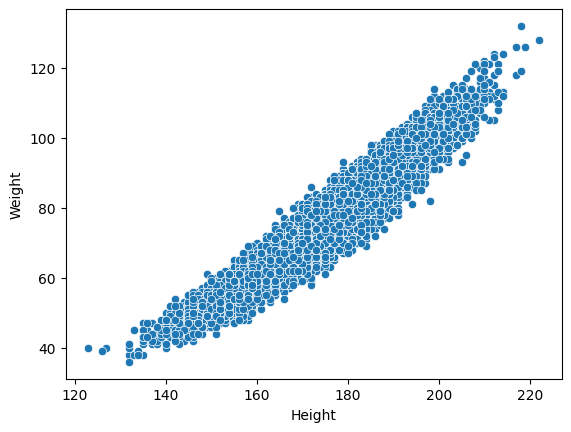

In [13]:
#6
sb.scatterplot(x='Height', y='Weight', data=df) 
plt.show()


Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')
Column 'Calories' not found in dataframe
Column 'Calories' not found in dataframe
Column 'Calories' not found in dataframe
Column 'Calories' not found in dataframe


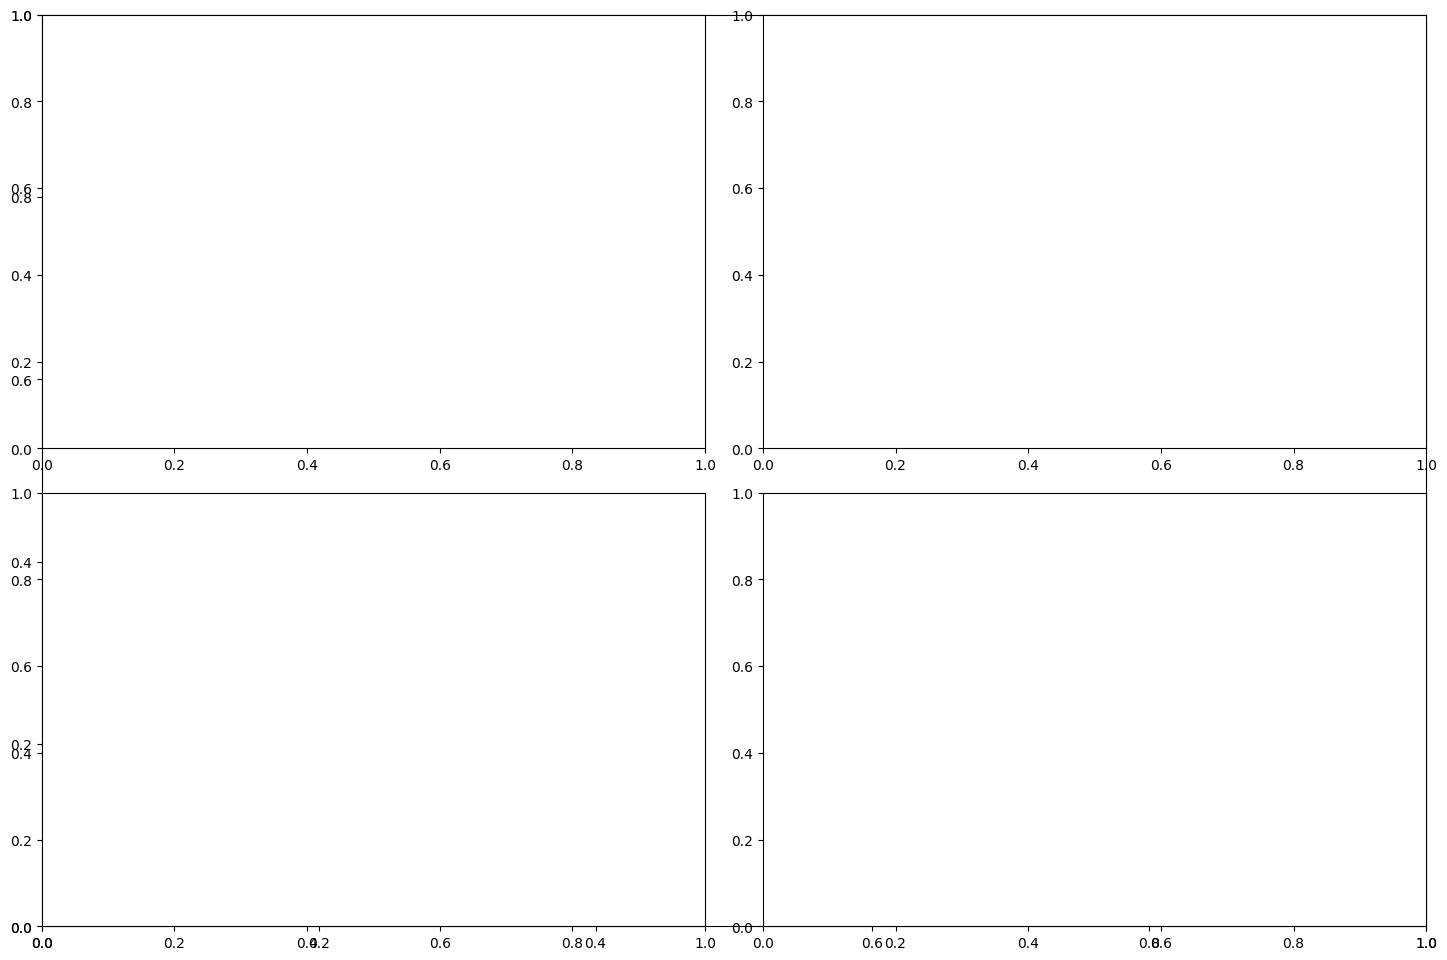

In [17]:
#7
print(df.columns)
parameters = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(parameters):
    plt.subplot(2, 2, i+1)
    x = df.sample(min(1000, len(df)))  # Prevent sampling error
    if 'Calories' in df.columns:  # Ensure 'Calories' exists
        sb.scatterplot(x=col, y='Calories', data=x)
    else:
        print("Column 'Calories' not found in dataframe")
plt.tight_layout()
plt.show()


In [ ]:
#8
features=df.select_dtypes(include='float').columns
plt.subplots(figsize=(15,10))
for i, col in enumerate(parameters):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()


In [ ]:
#9
df.replace({'male':0, 'female':1},
            inplace=True)
df.head()

In [ ]:
#10
plt.fugure(figsize=(8,8))
sb.heatmap(df.corr()>0.9,
           annot=True,
           cbar=False)
plt.show()

In [ ]:
#11
to_remove=['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)

In [ ]:
#12
parameters=df.drop(['User_ID', 'Calories'], axis=1)
target= df['Calories'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,test_size=0.1,random_state=22)
X_train.shape, X_val.shape
    

In [ ]:
#13
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [ ]:
#14
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i] : }')
    
    train_preds = models[i].predict(X_train)
    print('Training Error: ', mae(Y_train, train_preds))
    
    val_preds = models[i].predict(X_val)
    print('Validation Error: ', mae(Y_val, val_preds))
    print()